In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import xarray

DATA_DIR = "../Data/"
GOES_DIR = DATA_DIR+"GOES/"
FIIRMS_DIR = DATA_DIR+"FIIRMS/"
MOPITT_DIR = "/media/darp_lord/35E4790223F5E938/DATA/MOPITT/"

In [2]:
GOES_FILES = []
for dirname, _, filenames in os.walk(GOES_DIR):
    for filename in filenames:
        split = filename.split(".")[0].split("_")
        times = split[-3:]
        band_type = split[1]
        channel = band_type.split("-")[-1]
        metric_type = band_type[:-(len(channel)+1)]
        GOES_FILES.append((
            times[0][1:],
            times[1][1:],
            times[2][1:],
            metric_type,
            channel,
            os.path.join(dirname, filename)))
GOES_FILES = pd.DataFrame(GOES_FILES, columns=["start", "end", "creation", "metric", "channel", "path"])
GOES_FILES.head()

,start,end,creation,metric,channel,path
0,20202770713000,20202770715000,20202770715470,GLM-L2-GLMC,M3,../Data/GOES/OR_GLM-L2-GLMC-M3_G17_s2020277071...
1,20201821800000,20201821800200,20201821800219,GLM-L2,LCFA,../Data/GOES/OR_GLM-L2-LCFA_G17_s2020182180000...
2,20202760001160,20202760003533,20202760003572,ABI-L1b-RadC,M6C02,../Data/GOES/00/OR_ABI-L1b-RadC-M6C02_G16_s202...
3,20202760006160,20202760008533,20202760008563,ABI-L1b-RadC,M6C02,../Data/GOES/00/OR_ABI-L1b-RadC-M6C02_G16_s202...
4,20202760011160,20202760013533,20202760013563,ABI-L1b-RadC,M6C02,../Data/GOES/00/OR_ABI-L1b-RadC-M6C02_G16_s202...


In [3]:
goes_sorted = GOES_FILES.sort_values('start')
goes_sorted = goes_sorted[goes_sorted['metric']=="ABI-L1b-RadC"].reset_index(drop=True)
goes_sorted.head(10)

,start,end,creation,metric,channel,path
0,20202760001160,20202760003533,20202760003572,ABI-L1b-RadC,M6C02,../Data/GOES/00/OR_ABI-L1b-RadC-M6C02_G16_s202...
1,20202760001160,20202760003545,20202760004012,ABI-L1b-RadC,M6C07,../Data/GOES/00/OR_ABI-L1b-RadC-M6C07_G16_s202...
2,20202760001160,20202760003533,20202760004058,ABI-L1b-RadC,M6C14,../Data/GOES/00/OR_ABI-L1b-RadC-M6C14_G16_s202...
3,20202760001160,20202760003539,20202760004063,ABI-L1b-RadC,M6C15,../Data/GOES/00/OR_ABI-L1b-RadC-M6C15_G16_s202...
4,20202760006160,20202760008533,20202760008563,ABI-L1b-RadC,M6C02,../Data/GOES/00/OR_ABI-L1b-RadC-M6C02_G16_s202...
5,20202760006160,20202760008533,20202760009060,ABI-L1b-RadC,M6C14,../Data/GOES/00/OR_ABI-L1b-RadC-M6C14_G16_s202...
6,20202760006160,20202760008545,20202760009055,ABI-L1b-RadC,M6C07,../Data/GOES/00/OR_ABI-L1b-RadC-M6C07_G16_s202...
7,20202760006160,20202760008539,20202760009039,ABI-L1b-RadC,M6C15,../Data/GOES/00/OR_ABI-L1b-RadC-M6C15_G16_s202...
8,20202760011160,20202760013545,20202760014024,ABI-L1b-RadC,M6C07,../Data/GOES/00/OR_ABI-L1b-RadC-M6C07_G16_s202...
9,20202760011160,20202760013539,20202760014060,ABI-L1b-RadC,M6C15,../Data/GOES/00/OR_ABI-L1b-RadC-M6C15_G16_s202...


In [4]:
goes_test = [xarray.open_dataset(GOES_FILES['path'][i]) for i in range(2,5)]
goes_test

[<xarray.Dataset>
 Dimensions:                                           (band: 1, num_star_looks: 24, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 10000, y: 6000)
 Coordinates:
     t                                                 datetime64[ns] ...
   * y                                                 (y) float32 0.128233 .....
   * x                                                 (x) float32 -0.101353 ....
     y_image                                           float32 ...
     x_image                                           float32 ...
     band_id                                           (band) int8 ...
     band_wavelength                                   (band) float32 ...
     t_star_look                                       (num_star_looks) datetime64[ns] ...
     band_wavelength_star_look                         (num_star_looks) float32 ...
 Dimensions without coordinates: band, num_star_looks, number_of_image_bounds, number_of_time_bounds
 Data variables:
 

In [5]:
rad = [(goes_test[i]['Rad'].data-goes_test[i]['min_radiance_value_of_valid_pixels'].data)/(goes_test[i]['max_radiance_value_of_valid_pixels'].data-goes_test[i]['min_radiance_value_of_valid_pixels'].data) for i in range(3)]
rad

[array([[       nan,        nan,        nan, ..., 0.00612119, 0.00466406,
         0.00952115],
        [       nan,        nan,        nan, ..., 0.00952115, 0.00757832,
         0.00757832],
        [       nan,        nan,        nan, ..., 0.00612119, 0.00369264,
         0.01049258],
        ...,
        [0.3344608 , 0.3305751 , 0.33106083, ..., 0.00563548, 0.00806403,
         0.0066069 ],
        [0.33883214, 0.33203223, 0.33980358, ..., 0.00612119, 0.00806403,
         0.00757832],
        [0.33154655, 0.33834645, 0.3456321 , ..., 0.00320693, 0.01049258,
         0.0066069 ]], dtype=float32),
 array([[       nan,        nan,        nan, ..., 0.00693712, 0.00693712,
         0.00895473],
        [       nan,        nan,        nan, ..., 0.00794592, 0.00491952,
         0.00895473],
        [       nan,        nan,        nan, ..., 0.00996353, 0.00643272,
         0.00391071],
        ...,
        [0.31663972, 0.32218817, 0.32168376, ..., 0.00693712, 0.00895473,
         0.00592832

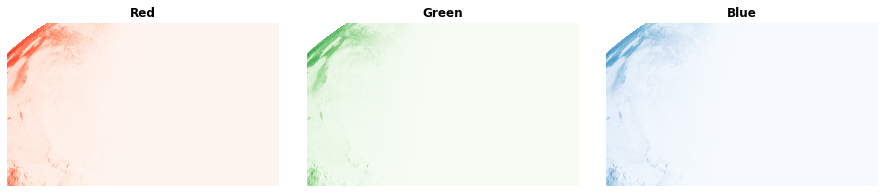

In [8]:
fig, ([ax1, ax2, ax3]) = plt.subplots(1, 3, figsize=(16,3))

ax1.imshow(rad[0], cmap='Reds', vmax=1, vmin=0)
ax1.set_title('Red', fontweight='semibold')
ax1.axis('off');

ax2.imshow(rad[1], cmap='Greens', vmax=1, vmin=0)
ax2.set_title('Green', fontweight='semibold')
ax2.axis('off');

ax3.imshow(rad[0], cmap='Blues', vmax=1, vmin=0)
ax3.set_title('Blue', fontweight='semibold')
ax3.axis('off');

plt.subplots_adjust(wspace=.02)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 9999.5, 5999.5, -0.5)

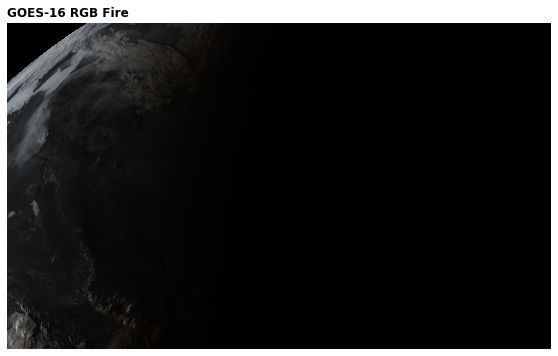

In [7]:
RGB = np.dstack(rad)
fig, (ax1) = plt.subplots(1,1, figsize=(16,6))

# The RGB using the raw veggie band
ax1.imshow(RGB)
ax1.set_title('GOES-16 RGB Fire', fontweight='semibold', loc='left', fontsize=12);
ax1.axis('off')

## FIIRMS

In [2]:
suomi_viirs = pd.read_csv(FIIRMS_DIR+"SUOMI_VIIRS_C2_USA_contiguous_and_Hawaii_7d.csv")
suomi_viirs.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
0,31.15063,-87.99097,316.7,0.49,0.65,2020-09-26,648,N,nominal,2.0NRT,289.4,2.4,N
1,31.15034,-87.98576,314.1,0.49,0.65,2020-09-26,648,N,nominal,2.0NRT,290.4,2.4,N
2,30.48426,-91.18553,300.2,0.74,0.76,2020-09-26,648,N,nominal,2.0NRT,289.5,2.1,N
3,30.34416,-88.48821,304.4,0.51,0.66,2020-09-26,648,N,nominal,2.0NRT,291.5,1.4,N
4,30.32692,-91.28209,299.0,0.75,0.77,2020-09-26,648,N,nominal,2.0NRT,288.4,1.1,N


In [3]:
suomi_viirs['acq_date'].value_counts()

2020-09-28    7096
2020-09-29    5666
2020-10-01    5472
2020-09-30    5075
2020-10-02    4442
2020-09-26    4155
2020-09-27    3777
Name: acq_date, dtype: int64

In [4]:
suomi_viirs['confidence'].value_counts()

nominal    31949
high        2540
low         1194
Name: confidence, dtype: int64

In [9]:
usa = suomi_viirs[suomi_viirs['longitude'].between(left=-124.848974, right=24.396308) & suomi_viirs['latitude'].between(left=-66.885444, right=49.384358)]
usa['confidence'].value_counts()

nominal    31909
high        2539
low         1189
Name: confidence, dtype: int64

In [10]:
usa[usa['confidence']=='high']

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
434,41.15664,-106.19560,367.0,0.49,0.48,2020-09-26,824,N,high,2.0NRT,289.1,17.7,N
472,41.15293,-106.26195,367.0,0.49,0.49,2020-09-26,824,N,high,2.0NRT,295.7,14.1,N
473,41.15248,-106.25632,367.0,0.49,0.49,2020-09-26,824,N,high,2.0NRT,301.1,27.0,N
478,41.14816,-106.20251,367.0,0.49,0.48,2020-09-26,824,N,high,2.0NRT,373.6,3490.6,N
479,41.14769,-106.19657,367.0,0.49,0.48,2020-09-26,824,N,high,2.0NRT,335.5,665.6,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35374,39.96595,-123.15643,367.0,0.41,0.37,2020-10-02,2118,N,high,2.0NRT,362.5,225.7,D
35379,39.96747,-123.17160,367.0,0.41,0.37,2020-10-02,2118,N,high,2.0NRT,344.8,56.1,D
35388,39.98605,-123.13640,367.0,0.41,0.37,2020-10-02,2118,N,high,2.0NRT,304.6,12.7,D
35521,40.35576,-123.39991,367.0,0.41,0.37,2020-10-02,2118,N,high,2.0NRT,309.7,17.9,D


## Wildfire Events

In [11]:
import requests

resp = requests.get("https://eonet.sci.gsfc.nasa.gov/api/v3/categories/wildfires")

In [12]:
resp.json()

{'title': 'EONET Events: Wildfires',
 'description': 'Wildfires includes all nature of fire, including forest and plains fires, as well as urban and industrial fire events. Fires may be naturally caused or manmade.',
 'link': 'https://eonet.sci.gsfc.nasa.gov/api/v3/categories/wildfires',
 'events': [{'id': 'EONET_5101',
   'title': 'Wildfire - SE of Lysychansk, Luhansk - Ukraine',
   'description': None,
   'link': 'https://eonet.sci.gsfc.nasa.gov/api/v3/events/EONET_5101',
   'closed': None,
   'categories': [{'id': 'wildfires', 'title': 'Wildfires'}],
   'sources': [{'id': 'PDC',
     'url': 'http://emops.pdc.org/emops/?hazard_id=115089'}],
   'geometry': [{'magnitudeValue': None,
     'magnitudeUnit': None,
     'date': '2020-10-01T13:40:00Z',
     'type': 'Point',
     'coordinates': [38.678984804, 48.823428824]}]},
  {'id': 'EONET_5095',
   'title': 'Wildfire - Shasta County (Zogg Fire), California, United States',
   'description': None,
   'link': 'https://eonet.sci.gsfc.nasa.go

In [13]:
import s3fs

# Use the anonymous credentials to access public data
fs = s3fs.S3FileSystem(anon=True)
fs.ls('noaa-goes17/ABI-L1b-RadC/2020/')

['noaa-goes17/ABI-L1b-RadC/2020/001',
 'noaa-goes17/ABI-L1b-RadC/2020/002',
 'noaa-goes17/ABI-L1b-RadC/2020/003',
 'noaa-goes17/ABI-L1b-RadC/2020/004',
 'noaa-goes17/ABI-L1b-RadC/2020/005',
 'noaa-goes17/ABI-L1b-RadC/2020/006',
 'noaa-goes17/ABI-L1b-RadC/2020/007',
 'noaa-goes17/ABI-L1b-RadC/2020/008',
 'noaa-goes17/ABI-L1b-RadC/2020/009',
 'noaa-goes17/ABI-L1b-RadC/2020/010',
 'noaa-goes17/ABI-L1b-RadC/2020/011',
 'noaa-goes17/ABI-L1b-RadC/2020/012',
 'noaa-goes17/ABI-L1b-RadC/2020/013',
 'noaa-goes17/ABI-L1b-RadC/2020/014',
 'noaa-goes17/ABI-L1b-RadC/2020/015',
 'noaa-goes17/ABI-L1b-RadC/2020/016',
 'noaa-goes17/ABI-L1b-RadC/2020/017',
 'noaa-goes17/ABI-L1b-RadC/2020/018',
 'noaa-goes17/ABI-L1b-RadC/2020/019',
 'noaa-goes17/ABI-L1b-RadC/2020/020',
 'noaa-goes17/ABI-L1b-RadC/2020/021',
 'noaa-goes17/ABI-L1b-RadC/2020/022',
 'noaa-goes17/ABI-L1b-RadC/2020/023',
 'noaa-goes17/ABI-L1b-RadC/2020/024',
 'noaa-goes17/ABI-L1b-RadC/2020/025',
 'noaa-goes17/ABI-L1b-RadC/2020/026',
 'noaa-goes1